<a href="https://colab.research.google.com/github/bhargav-borah/SelfOrgMap-FraudDetection/blob/main/self_organising_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self Organising Map

## Importing the libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the data set

In [63]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [65]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 14, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualising the Results

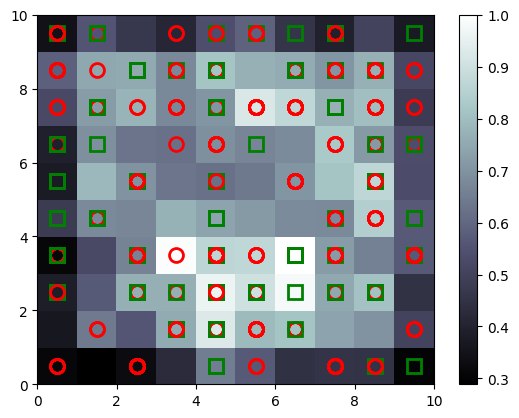

In [66]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
show()

## Finding the frauds

In [67]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(0,
              9): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
                     0.375     , 0.05561404, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      , 0.01212   ]), array([1.        , 0.15533835, 0.32142857, 0.5       , 0.38461538,
                     0.375     , 0.00877193, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.        , 0.        ]), array([1.        , 0.05639098, 0.78571429, 1.        , 0.        ,
                     0.75      , 0.        , 0.        , 0.        , 0.        ,
                     1.        , 1.        , 0.225     , 1.        ]), array([1.        , 0.19428571, 0.52089286, 0.5       , 0.15384615,
                     0.5       , 0.        , 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.089     , 0.        ]), array([1.00000000e+00, 1.86766917e-01, 4.46428571e-01, 0.00000000e+00,

In [69]:
frauds = np.concatenate((mappings[(4, 2)], mappings[(5, 7)], mappings[(3, 3)], mappings[(6, 2)], mappings[(6, 3)]), axis = 0)

In [70]:
frauds

array([[0.00000000e+00, 1.05263158e-01, 3.66071429e-01, 5.00000000e-01,
        7.69230769e-01, 3.75000000e-01, 2.49122807e-02, 1.00000000e+00,
        1.00000000e+00, 2.98507463e-02, 1.00000000e+00, 5.00000000e-01,
        2.45000000e-02, 0.00000000e+00],
       [0.00000000e+00, 1.65413534e-01, 4.46428571e-01, 5.00000000e-01,
        3.84615385e-01, 3.75000000e-01, 5.26315789e-02, 1.00000000e+00,
        1.00000000e+00, 1.79104478e-01, 1.00000000e+00, 5.00000000e-01,
        6.00000000e-02, 5.67000000e-03],
       [0.00000000e+00, 1.46616541e-01, 3.21428571e-01, 5.00000000e-01,
        7.69230769e-01, 3.75000000e-01, 2.98245614e-01, 1.00000000e+00,
        1.00000000e+00, 7.46268657e-02, 1.00000000e+00, 5.00000000e-01,
        6.00000000e-02, 0.00000000e+00],
       [0.00000000e+00, 1.32781955e-01, 3.83928571e-01, 5.00000000e-01,
        7.69230769e-01, 3.75000000e-01, 1.45614035e-02, 1.00000000e+00,
        1.00000000e+00, 7.46268657e-02, 1.00000000e+00, 5.00000000e-01,
        0.000

In [71]:
frauds = sc.inverse_transform(frauds)

In [72]:
frauds

array([[0.0000e+00, 2.0750e+01, 1.0250e+01, 2.0000e+00, 1.1000e+01,
        4.0000e+00, 7.1000e-01, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 4.9000e+01, 1.0000e+00],
       [0.0000e+00, 2.4750e+01, 1.2500e+01, 2.0000e+00, 6.0000e+00,
        4.0000e+00, 1.5000e+00, 1.0000e+00, 1.0000e+00, 1.2000e+01,
        1.0000e+00, 2.0000e+00, 1.2000e+02, 5.6800e+02],
       [0.0000e+00, 2.3500e+01, 9.0000e+00, 2.0000e+00, 1.1000e+01,
        4.0000e+00, 8.5000e+00, 1.0000e+00, 1.0000e+00, 5.0000e+00,
        1.0000e+00, 2.0000e+00, 1.2000e+02, 1.0000e+00],
       [0.0000e+00, 2.2580e+01, 1.0750e+01, 2.0000e+00, 1.1000e+01,
        4.0000e+00, 4.1500e-01, 1.0000e+00, 1.0000e+00, 5.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 5.6100e+02],
       [0.0000e+00, 3.0000e+01, 5.2900e+00, 2.0000e+00, 1.0000e+01,
        2.0000e+00, 2.2500e+00, 1.0000e+00, 1.0000e+00, 5.0000e+00,
        1.0000e+00, 2.0000e+00, 9.9000e+01, 5.0100e+02],
       [0.0000e+00, 1.8830e+01, 9.5